# Capa Oro: Datos listos

En este notebook realizamos la construcción de la **Capa Oro**.

**Objetivos:**
- Integrar y depurar los datos de la Capa Plata.
- Generar variables derivadas (ej: amplitud térmica, rangos de presión y humedad).
- Validar la calidad final de los datos.
- Exportar los datasets listos para minería de datos y modelos predictivos.

# Importar las librerías necesarias

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

PLATA_DIR = Path('../data/plata')
ORO_DIR = Path('../data/oro')
ORO_DIR.mkdir(parents=True, exist_ok=True)

# Archivos de entrada
archivo_diario = PLATA_DIR / 'dataset_plata_diario_final.csv'
archivo_horario = PLATA_DIR / 'dataset_plata_horario_final.csv'

print("Importación de librerías completada.")

Importación de librerías completada.


## Carga de Datos
Leemos los archivos generados en la **Capa Plata**.

In [2]:
# Lectura de datasets
df_diario = pd.read_csv(archivo_diario, parse_dates=['FECHA'])
df_horario = pd.read_csv(archivo_horario, parse_dates=['FECHA_HORA'])

# print('Datos cargados:')
# print(' - Diario:', df_diario.shape)
# print(' - Horario:', df_horario.shape)

# df_diario.info()
# display(df_diario.head())
# df_horario.info()
# display(df_horario.head())

## Generación de Variables Derivadas
Creamos nuevas variables útiles para minería de datos y análisis exploratorio:

In [3]:
# Variables derivadas diarias
df_diario['AMP_TERMICA'] = df_diario['TEMP_MAX'] - df_diario['TEMP_MIN']
df_diario['RANGO_PRESION'] = df_diario['PNM_MAX'] - df_diario['PNM_MIN']
df_diario['RANGO_HUMEDAD'] = df_diario['HUM_MAX'] - df_diario['HUM_MIN']

# Redondeo a 1 decimal para consistencia
cols_derivadas = ['AMP_TERMICA', 'RANGO_PRESION', 'RANGO_HUMEDAD']
df_diario[cols_derivadas] = df_diario[cols_derivadas].round(1)

# print('Variables derivadas creadas:')
# display(df_diario.head())

## Validación Final de la Capa Oro
Confirmamos calidad de datos antes de exportar:

In [4]:
# print('Valores nulos por columna:')
# print(df_diario.isnull().sum())
# print('\nResumen estadístico:')
# display(df_diario.describe().T)

# Confirmar fechas continuas
fechas_esperadas = pd.date_range(df_diario['FECHA'].min(), df_diario['FECHA'].max(), freq='D')
faltantes = set(fechas_esperadas.date) - set(df_diario['FECHA'].dt.date.unique())
# print(f'Fechas faltantes en diario: {len(faltantes)}')
# print(f'Detalle de fechas: {faltantes}')

In [5]:
fechas_esperadas = pd.date_range(
    start=df_diario['FECHA'].min(), 
    end=df_diario['FECHA'].max(), 
    freq='D'
).date

fechas_existentes = set(df_diario['FECHA'].dt.date.unique())
fechas_faltantes = sorted(set(fechas_esperadas) - fechas_existentes)

print("Fechas faltantes detectadas:")
print(fechas_faltantes)

for fecha in fechas_faltantes:
    print(f"\n📅 {fecha} – Estaciones sin datos:")
    estaciones_con_dato = df_diario.loc[df_diario['FECHA'].dt.date == fecha, 'ESTACION'].unique()
    estaciones_sin_dato = set(df_diario['ESTACION'].unique()) - set(estaciones_con_dato)
    print(estaciones_sin_dato)

Fechas faltantes detectadas:
[]


In [6]:
# Fechas esperadas
fechas_esperadas = pd.date_range(
    start=df_diario['FECHA'].min(), 
    end=df_diario['FECHA'].max(), 
    freq='D'
).date

# MultiIndex completo FECHA x ESTACION
estaciones = df_diario['ESTACION'].unique()
index_completo = pd.MultiIndex.from_product([fechas_esperadas, estaciones], names=['FECHA', 'ESTACION'])

# Reindexar y ver filas nulas
df_check = df_diario.set_index(['FECHA', 'ESTACION']).reindex(index_completo)
faltantes = df_check[df_check.isnull().any(axis=1)].reset_index()

print(f"Filas con datos faltantes: {len(faltantes)}")
display(faltantes.head(10))

Filas con datos faltantes: 0


,FECHA,ESTACION,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PNM_MEAN,PNM_MIN,PNM_MAX,HUM_MEAN,HUM_MIN,...,WIND_SPEED_MIN,WIND_SPEED_MAX,TEMP_MEAN_NORM,PNM_MEAN_NORM,HUM_MEAN_NORM,WIND_DIR_MEAN_NORM,WIND_SPEED_MEAN_NORM,AMP_TERMICA,RANGO_PRESION,RANGO_HUMEDAD


## Exportación de la Capa Oro
Guardamos los datasets listos para minería y modelado.

In [7]:
# Exportación a CSV
df_diario.to_csv(ORO_DIR / 'dataset_oro_diario.csv', index=False)
df_horario.to_csv(ORO_DIR / 'dataset_oro_horario.csv', index=False)

# print('Archivos exportados en data/oro:')
# print(' - dataset_oro_diario.csv')
# print(' - dataset_oro_horario.csv')

# Resumen y validación final del dataset

In [8]:
# print("Resumen general del dataset diario imputado:\n")
# print("Filas:", len(df_diario))
# print("Columnas:", len(df_diario.columns))
# print("Rango temporal:", df_diario['FECHA'].min(), "→", df_diario['FECHA'].max())

# print("\nValores nulos por columna:")
# print(df_diario.isnull().sum())

# print("\nEstadísticas descriptivas de las variables numéricas:")
# print(df_diario.describe().T)

# Visualizaciones

## Series promedio de las variables por estación

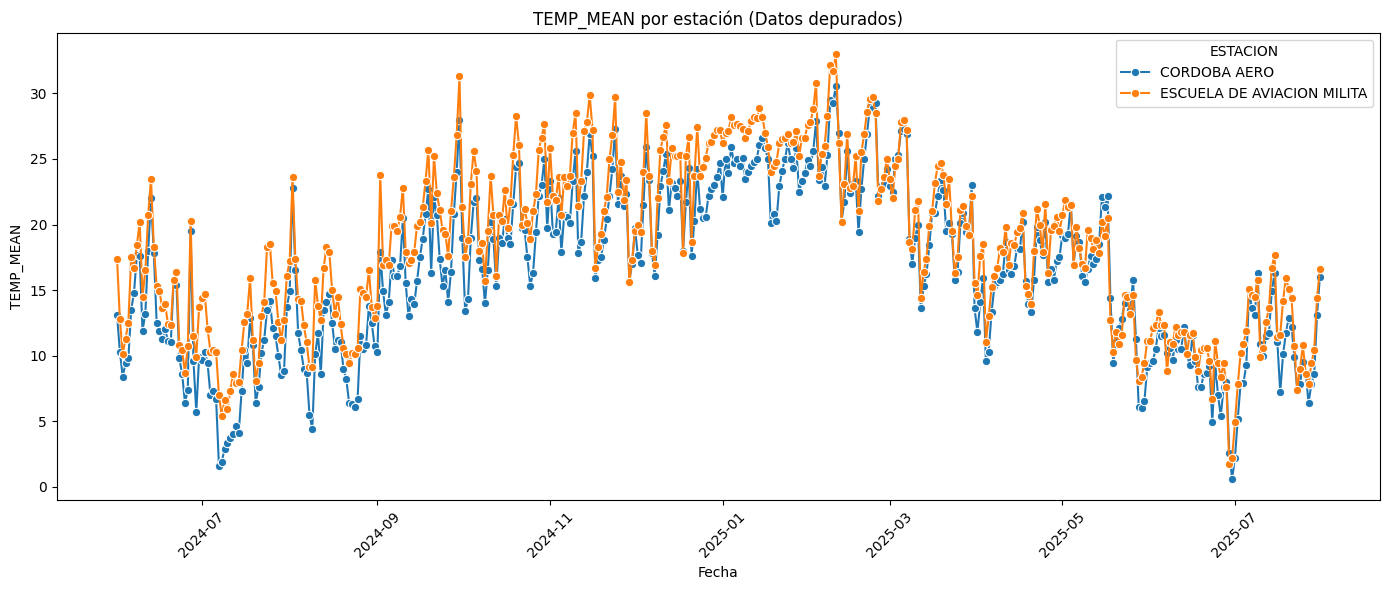

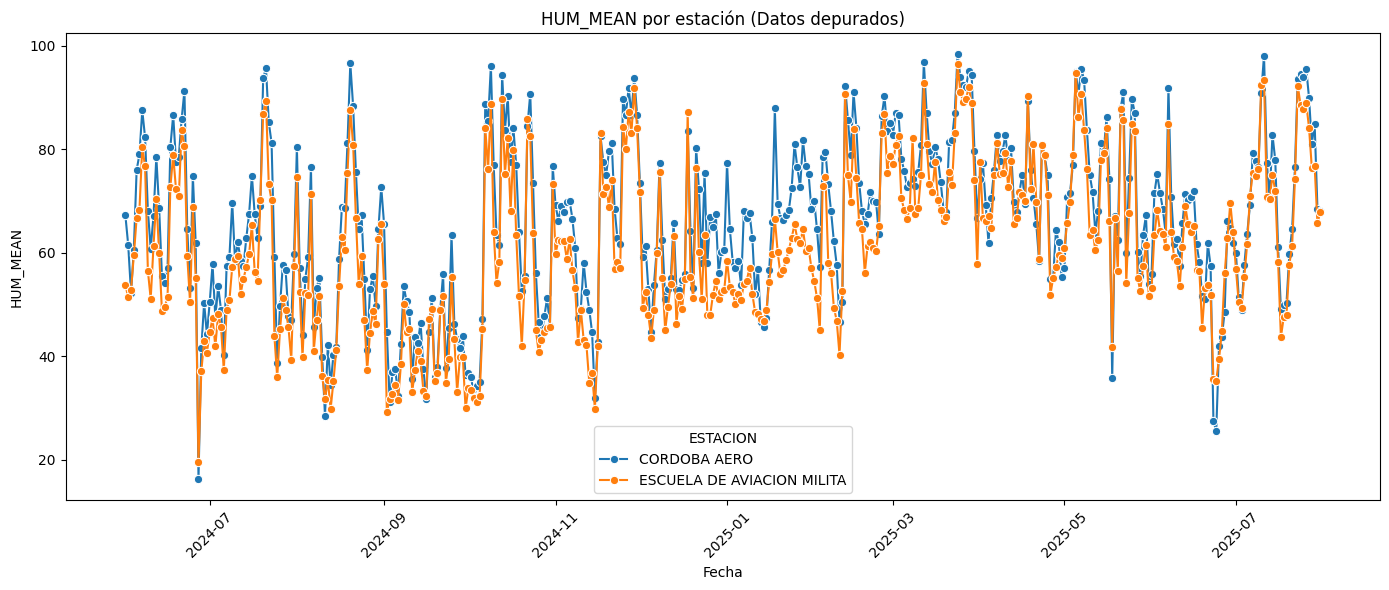

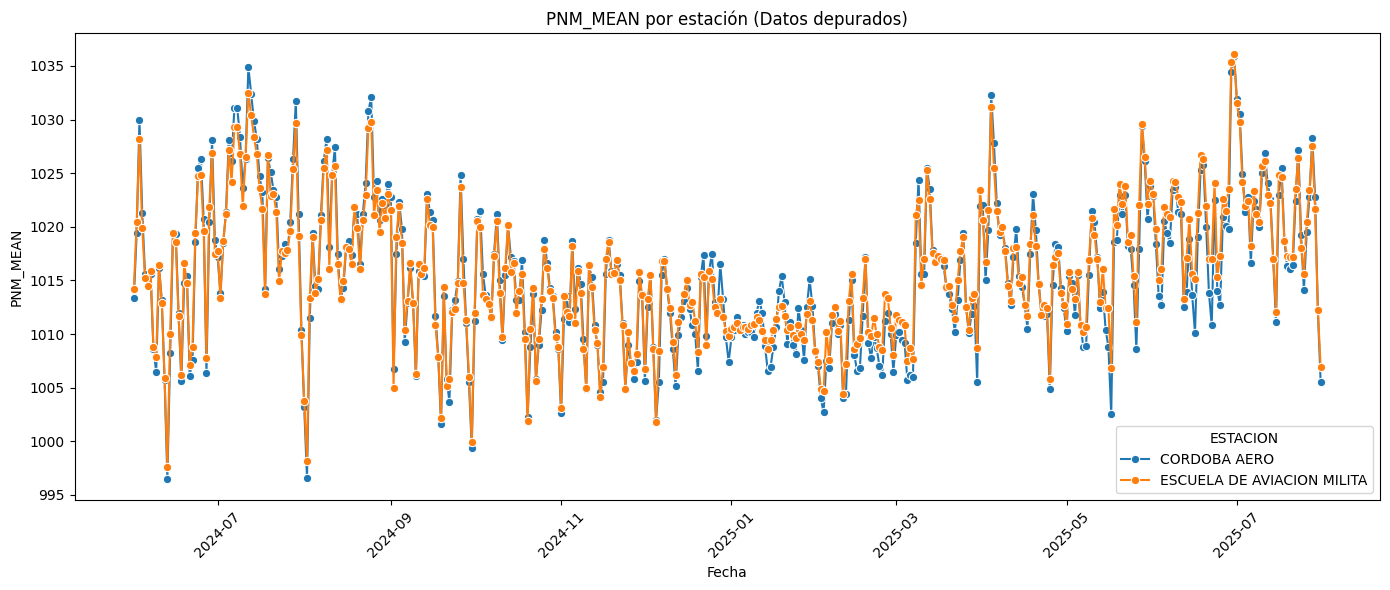

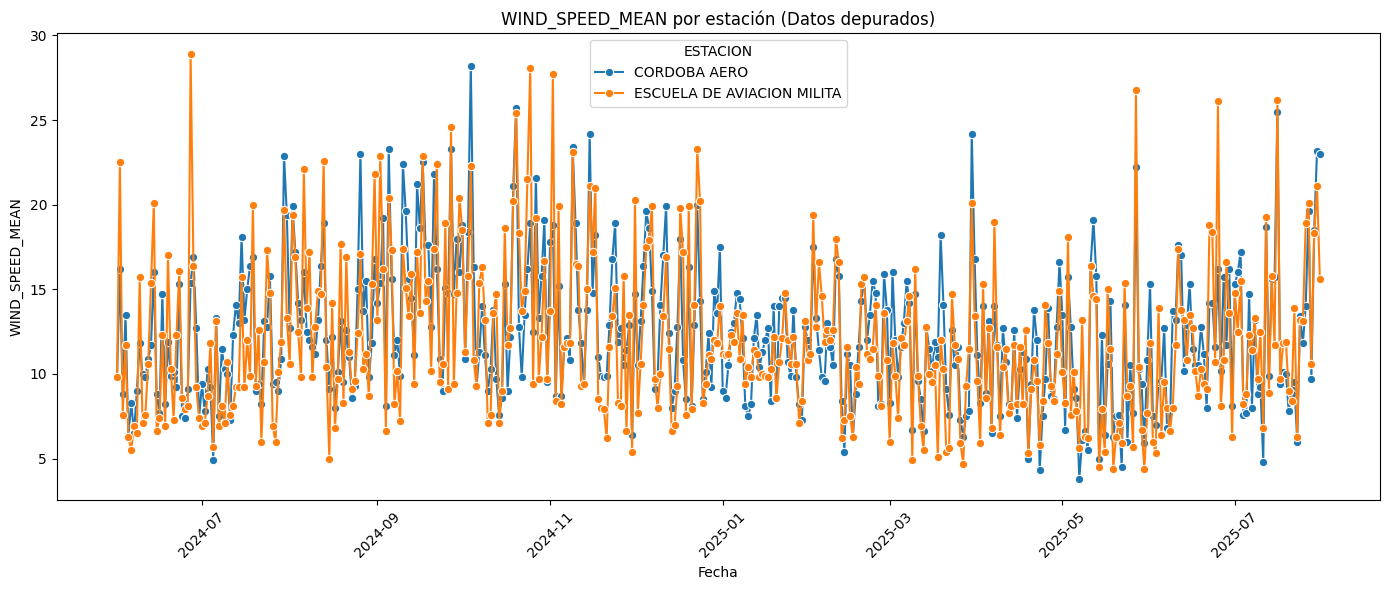

In [9]:
# Seleccionamos columnas clave
variables_clave = [
    'TEMP_MEAN', 'HUM_MEAN', 'PNM_MEAN', 'WIND_SPEED_MEAN'
]

estaciones_a_mostrar = ["CORDOBA AERO", "ESCUELA DE AVIACION MILITA"]

# Gráfico de series temporales por estación
for var in variables_clave:
    plt.figure(figsize=(14,6))
    sns.lineplot(data=df_diario[df_diario["ESTACION"].isin(estaciones_a_mostrar)], 
                 x='FECHA', 
                 y=var, 
                 hue='ESTACION', 
                 marker='o')
    plt.title(f'{var} por estación (Datos depurados)')
    plt.xlabel("Fecha")
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Distribución (Histograma) de cada variable clave

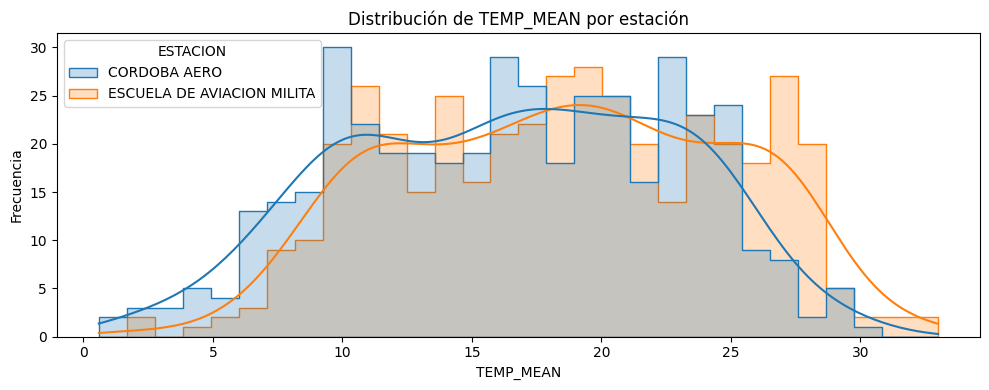

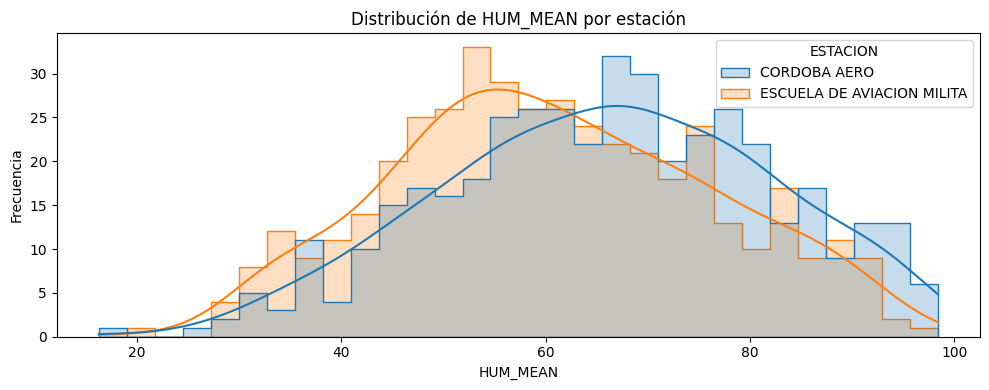

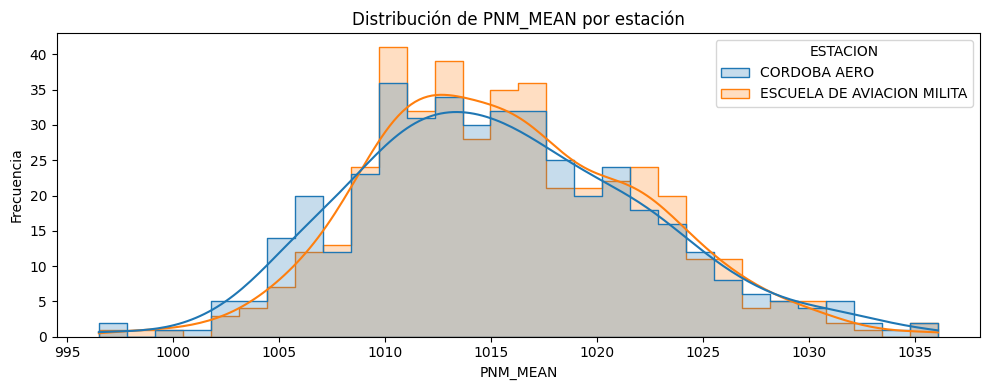

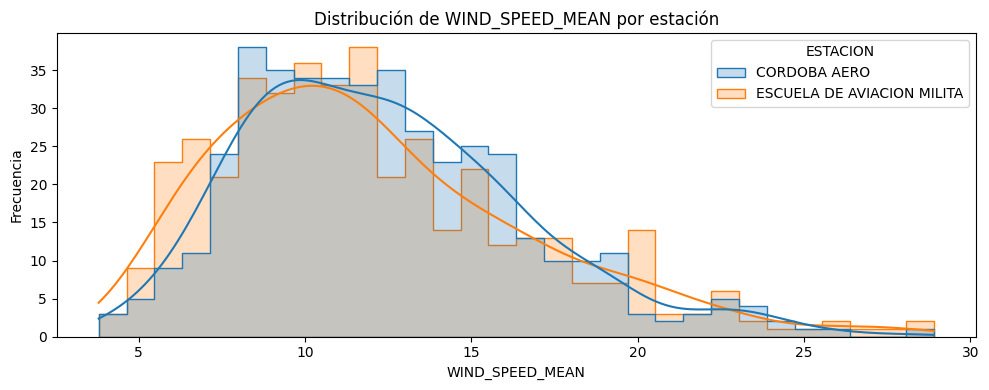

In [10]:
estaciones_a_mostrar = ["CORDOBA AERO", "ESCUELA DE AVIACION MILITA"]

for var in variables_clave:
    plt.figure(figsize=(10,4))
    sns.histplot(
        data=df_diario[df_diario["ESTACION"].isin(estaciones_a_mostrar)], 
        x=var, 
        hue="ESTACION", 
        bins=30, 
        kde=True, 
        element="step"
    )
    plt.title(f'Distribución de {var} por estación')
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

## Boxplots para comparar rangos entre estaciones

In [ ]:
for var in variables_clave:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df_diario[df_diario["ESTACION"].isin(estaciones_a_mostrar)],  
                x='ESTACION', 
                y=var)
    plt.title(f'Rangos de {var} por estación')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

## Heatmap de correlación entre variables principales

In [ ]:
# Variables a incluir en la matriz de correlación
variables_corr = ['TEMP_MEAN','PNM_MEAN','HUM_MEAN','WIND_SPEED_MEAN']

# Iterar por cada estación
for estacion in df_diario['ESTACION'].unique():
    df_est = df_diario[df_diario['ESTACION'] == estacion]
    
    # Calcular correlación
    corr_matrix = df_est[variables_corr].corr()
    
    # Crear gráfico
    plt.figure(figsize=(8,5))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        cbar=True
    )
    plt.title(f'Matriz de correlación – {estacion}')
    plt.tight_layout()
    plt.show()


# Comparación antes y después de la imputación

In [ ]:
# Variables de interés
variables_corr = ['TEMP_MEAN','PNM_MEAN','HUM_MEAN','WIND_SPEED_MEAN']

# Dataset original y depurado
df_original = pd.read_csv(PLATA_DIR / "dataset_plata_inicial.csv", parse_dates=['FECHA'])
df_dep = df_diario.copy()

# Iterar por cada estación
for estacion in estaciones_a_mostrar:
    df_orig_est = df_original[df_original['ESTACION'] == estacion]
    df_dep_est = df_dep[df_dep['ESTACION'] == estacion]
    
    print(f"\nGráficos para estación: {estacion}")
    
    # Crear subplots: 2 filas x 2 columnas (para las 4 variables)
    fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    
    for i, var in enumerate(variables_corr):
        # Agrupar por fecha
        df_original_group = df_orig_est.groupby('FECHA')[var].mean()
        df_dep_group = df_dep_est.groupby('FECHA')[var].mean()

        # Graficar
        axes[i].plot(df_original_group.index, df_original_group.values, label='Original (con huecos)', alpha=0.6)
        axes[i].plot(df_dep_group.index, df_dep_group.values, label='Imputado/Depurado', alpha=0.8)
        axes[i].set_title(f'{var} – {estacion}', fontsize=12)
        axes[i].set_ylabel(var)
        axes[i].legend()

    plt.suptitle(f'Comparación de variables antes y después de depuración – {estacion}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [ ]:

variable = "TEMP_MEAN"

# Dataset original y depurado
df_original = pd.read_csv(PLATA_DIR / "dataset_plata_inicial.csv", parse_dates=['FECHA'])
df_dep = df_diario.copy()

plt.figure(figsize=(12,6))

for estacion in estaciones_a_mostrar:
    # Filtrar por estación
    df_orig_est = df_original[df_original['ESTACION'] == estacion]
    df_dep_est = df_dep[df_dep['ESTACION'] == estacion]

    # Agrupar por fecha
    df_original_group = df_orig_est.groupby('FECHA')[variable].mean()
    df_dep_group = df_dep_est.groupby('FECHA')[variable].mean()

    # Graficar original y depurado
    #plt.plot(df_original_group.index, df_original_group.values, label=f'{estacion} – Original', alpha=0.6)
    plt.plot(df_dep_group.index, df_dep_group.values, label=f'{estacion} – Imputado', alpha=0.8)

plt.title(f"Comparación de {variable} entre estaciones")
plt.xlabel("Fecha")
plt.ylabel(variable)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusión

En esta etapa se trabajó sobre la **Capa Oro**, última fase del pipeline de datos, donde la información ya había sido limpiada y estructurada en la Capa Plata.  
El objetivo principal fue **preparar los datos para análisis avanzados y la generación de valor** mediante un conjunto de pasos clave:

1. **Selección de variables relevantes** para el modelado y análisis.  
2. **Normalización y codificación final** para garantizar compatibilidad con algoritmos.  
3. **División de datos en conjuntos de entrenamiento y prueba** para futuras tareas de clasificación o predicción.  
4. **Validación de consistencia y control de calidad**, evitando valores atípicos o inconsistencias que puedan afectar los modelos.  

Con la creación de esta capa, se completa el proceso de **depuración y validación de datos**, dejando la información **lista para aplicaciones analíticas, minería de datos y desarrollo de modelos predictivos**.  

La **Capa Oro** se convierte así en la **fuente confiable y optimizada** del proyecto, donde cada registro ha pasado por un flujo de **ingesta, limpieza, transformación y validación final**, asegurando **trazabilidad y calidad de la información** para su explotación.